# Youtube Trending 2017 - 2018 Analysis

YouTube has become one of the top social media platforms in the world for sharing videos. YouTube also has a trending page, which consists of videos steadily gaining views that YouTube considers to be "trending". Getting on YouTube trending could mean a substantial boost in the growth of both that video and your channel.

Using Trending Tab data from 2017 and 2018, this project attempts to gain insights on the statistics of YouTube Trending in 5 countries(US, Canada, UK, India, and France). 

# 

In [20]:
#Import neccessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
style.use('fivethirtyeight')
print("Imported modules!")

Imported modules!


In [95]:
#Create a concatenated dataframe from 5 countries

countries = ['CA', 'GB', 'IN', 'US', 'FR']
all_dfs = [pd.read_csv('{}videos.csv'.format(c)) for c in countries]

for i in range(len(all_dfs)):
    all_dfs[i]['Country'] = countries[i]
    all_dfs[i] = all_dfs[i][:37352] #Normalize the count of each country
    
df = pd.concat(all_dfs)

#Fill in NaN and print the dataframe
df = df.fillna('')
print(df)

          video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
37347  ItrBQsLN94U      18.28.05   
37348  hqci4uesnAY      18.28.05   
37349  sAIHFgU_UZI      18.28.05   
37350  QpgSr3NEMA4      18.28.05   
37351  cdl8tSMny9w      18.28.05   

                                                   title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
37347  هذا ما قاله المغاربة عن اعتذار الحموشي لـمول ا...   
37348  اتصال هاتفي معا مول تريبورتور هاكيفاش تعامل مع...   
37349  Eşkıya Dünyaya Hüküm

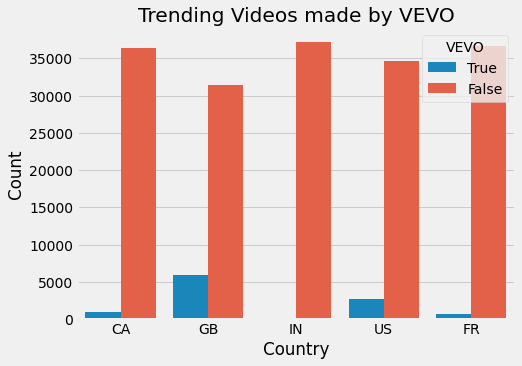

In [96]:
#Add new column showing whether or not a video is made from a VEVO creator

df['VEVO'] = df['channel_title'].apply(lambda x: str('VEVO' in x))

#Display the results in a countplot

plt.figure(figsize=(7,5))
sns.countplot(x='Country', hue='VEVO', data=df)
plt.ylabel('Count')
plt.title('Trending Videos made by VEVO')
plt.show()

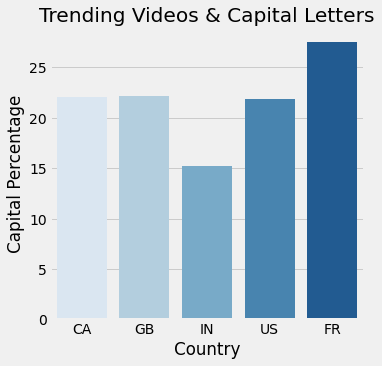

In [97]:
#Make column showcasing the percentage of capital letters per video

df['Capital Percentage'] = df['title'].apply(lambda x: 100*(sum(1 for c in x if c.isupper())/len(x)))

#Display results in bar plot

plt.figure(figsize=(5,5))
sns.barplot(x='Country', y='Capital Percentage', data=df, ci=None, palette='Blues')
plt.title('Trending Videos & Capital Letters')
plt.show()

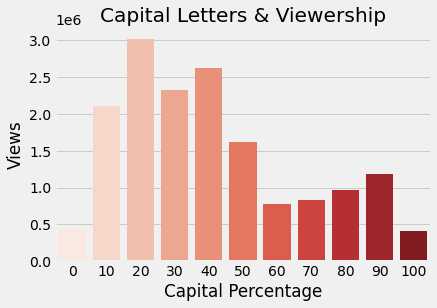

In [98]:
#Create a regression plot showcasing the relationship between capital letters and views

df['Capital Percentage'] = df['Capital Percentage'].apply(lambda x: str(round(x/10)*10))

sns.barplot(x='Capital Percentage', y='views', data=df, ci=None, order=['0','10','20','30','40','50','60','70','80','90','100'],
            palette='Reds')
plt.ylabel('Views')
plt.title('Capital Letters & Viewership')
plt.show()

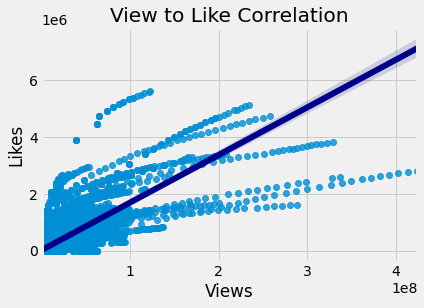

In [5]:
#Correlation between amount of views and amount of likes

sns.regplot(x='views', y='likes', data=df, line_kws={'color':'darkblue'})
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('View to Like Correlation')
plt.show()

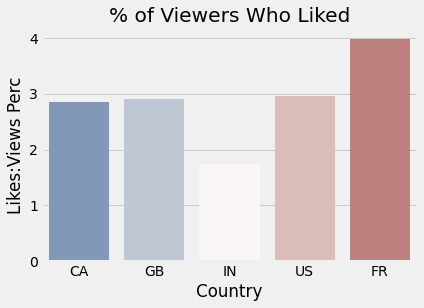

In [99]:
#Correlation between country and like-to-view percentage

df['Likes:Views Perc'] = df.apply(lambda row: int((row['likes']/row['views'])*100), axis=1)

sns.barplot(x='Country', y='Likes:Views Perc', data=df, ci=None, palette='vlag')
plt.title('% of Viewers Who Liked')
plt.show()

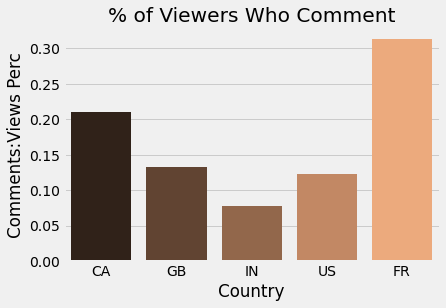

In [100]:
#Correlation between country and comment percentage

df['Comments:Views Perc'] = df.apply(lambda row: int((row['comment_count']/row['views'])*100), axis=1)

sns.barplot(x='Country', y='Comments:Views Perc', data=df, ci=None, palette='copper')
plt.title('% of Viewers Who Comment')
plt.show()

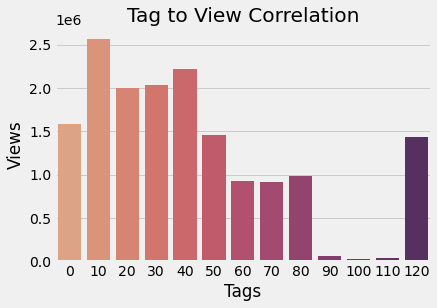

In [101]:
#Correlation between amount of tags and amount of views

def count_tags(tag_str):
    if '|' not in tag_str:
        return 0
    return len(tag_str.split('|'))

df['tags num'] = df['tags'].apply(lambda x: round(count_tags(x)/10)*10)

sns.barplot(x='tags num', y='views', data=df, palette='flare', ci=None)
plt.xlabel('Tags')
plt.ylabel('Views')
plt.title('Tag to View Correlation')
plt.show()

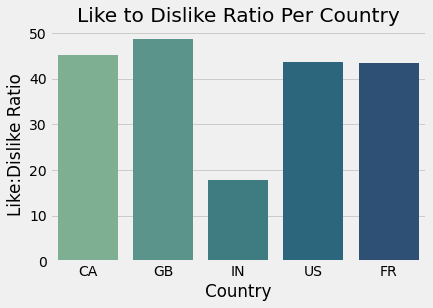

In [102]:
#Correlation between country and like-to-dislike ratio
    
df['Like:Dislike Ratio'] = df.apply(lambda row: row['likes']/row['dislikes'] if row['dislikes'] else 0, axis=1)

sns.barplot(x='Country', y='Like:Dislike Ratio', data=df, ci=None, palette='crest')
plt.title('Like to Dislike Ratio Per Country')
plt.show()

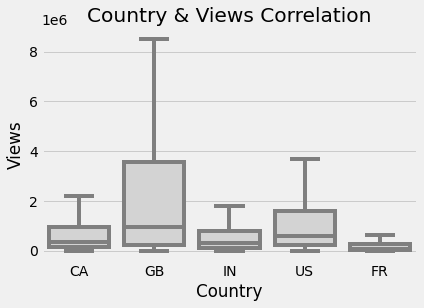

In [103]:
#Correlation between country and amount of views

sns.boxplot(x='Country', y='views', data=df, showfliers=False, color='lightgray')
plt.ylabel('Views')
plt.title('Country & Views Correlation')
plt.show()

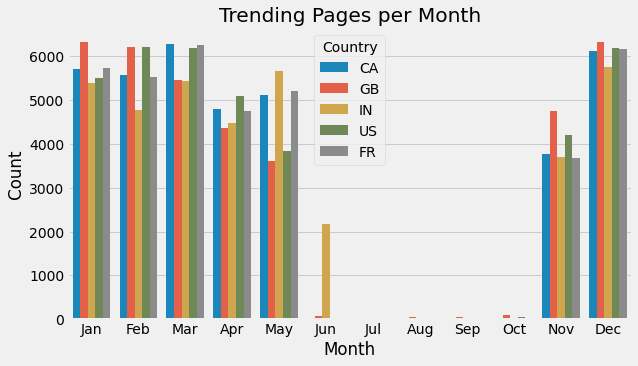

In [104]:
#Correlation between month and amount of trending videos per country

num2month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['publish_time'].apply(lambda x: num2month[int(x.split('-')[1])])

plt.figure(figsize=(9,5))
sns.countplot(x='Month', hue='Country', data=df, order=num2month.values())
plt.ylabel('Count')
plt.title('Trending Pages per Month')
plt.show()

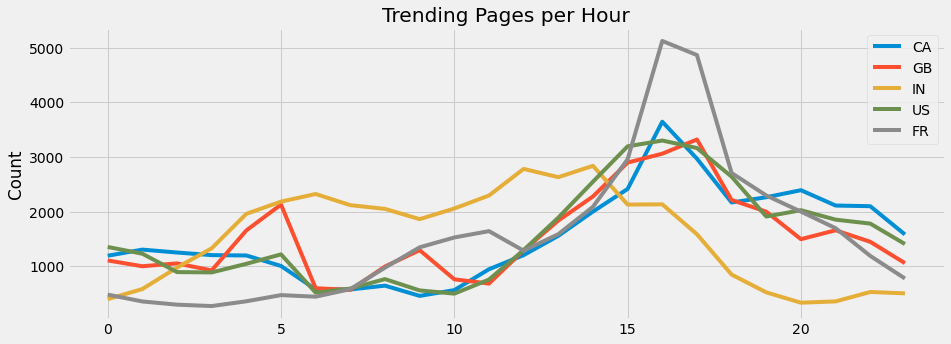

In [105]:
#Correlation between hour and trending pages per country

df['Hour'] = df['publish_time'].apply(lambda x: int(x.split('T')[1].split(':')[0]))

x = list(range(0,24)) * len(countries)
y = []
hue = []
for cont in countries:
    y_app = [len(np.array(df[(df['Country'] == cont) & (df['Hour'] == hour)])) for hour in np.unique(x)]
    y.append(y_app)
    hue.append([cont for i in range(len(np.unique(x)))])
y, hue = np.ravel(y), np.ravel(hue)

plt.figure(figsize=(14,5))
sns.lineplot(x=x, y=y, hue=hue)
plt.ylabel('Count')
plt.title('Trending Pages per Hour')
plt.show()

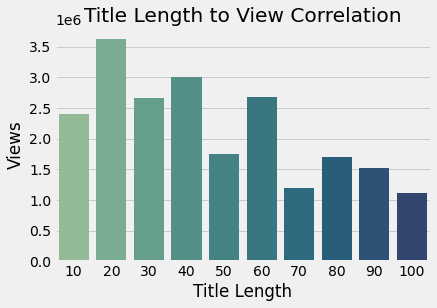

In [106]:
#Correlation between title length and viewership

df['Title Length'] = df['title'].apply(lambda x: int(np.ceil(len(x)/10)*10))

sns.barplot(x='Title Length', y='views', data=df, ci=None, palette='crest')
plt.ylabel('Views')
plt.title('Title Length to View Correlation')
plt.show()


COUNTRY: CA



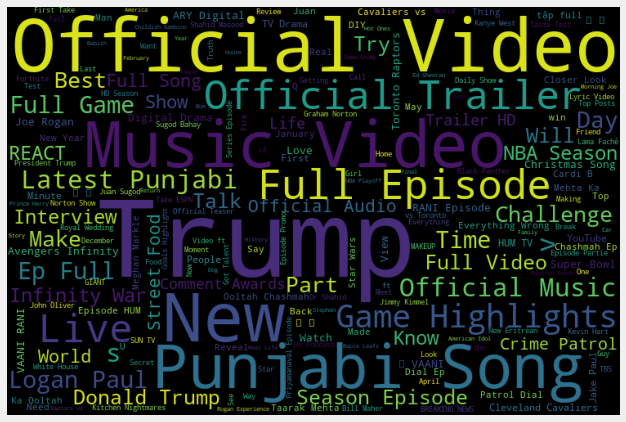


COUNTRY: GB



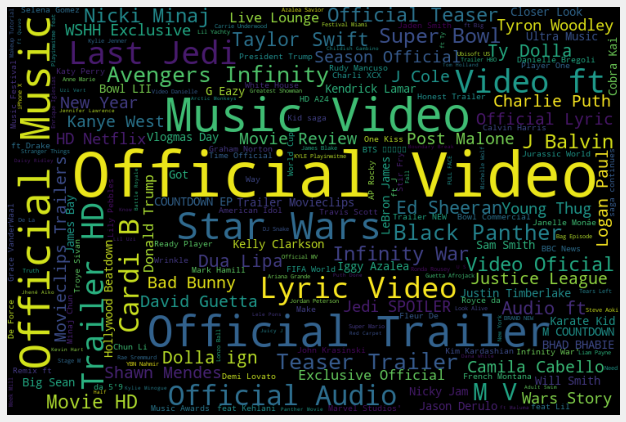


COUNTRY: IN



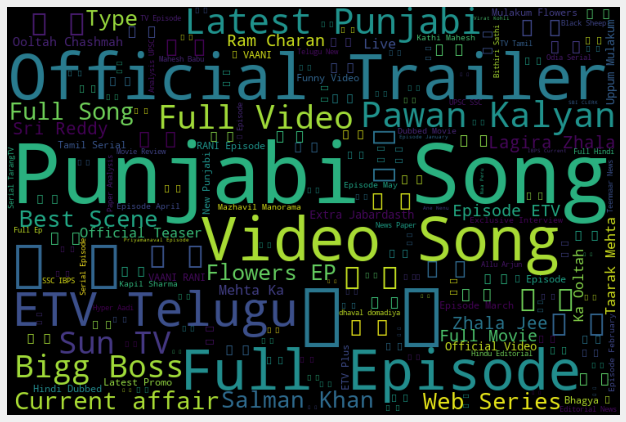


COUNTRY: US



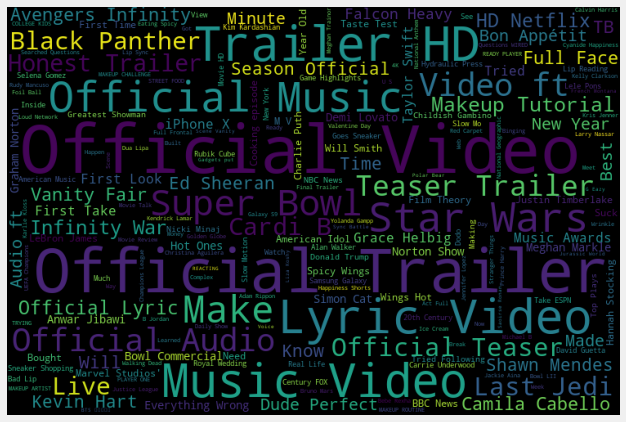


COUNTRY: FR



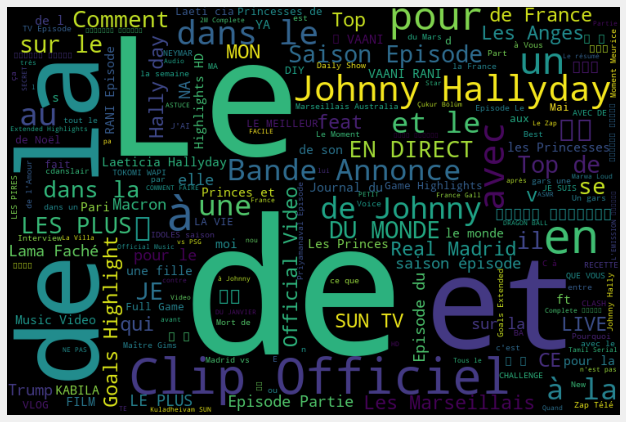

In [24]:
for cont in countries:
    print("\nCOUNTRY: %s\n" % cont)
    country_title = np.array(df[df['Country'] == cont]['title'])
    total_title = ' '.join(country_title)
    
    wordcloud = WordCloud(width = 750, height = 500, stopwords = set(STOPWORDS)).generate(total_title)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

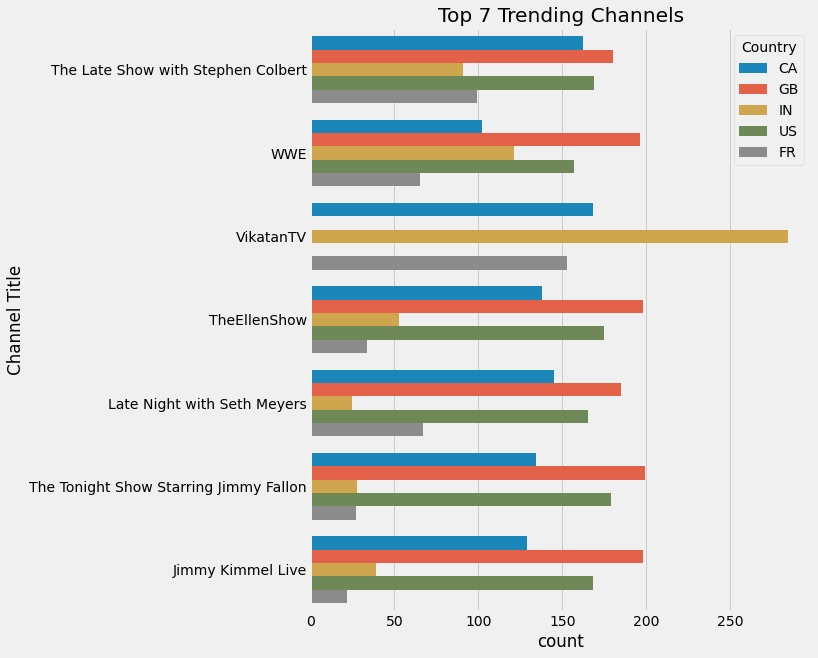

In [76]:
#Top 7 Youtube channels on the trending page with country data

plt.figure(figsize=(8,10))
sns.countplot(y='channel_title', hue='Country', data=df, order=df['channel_title'].value_counts().iloc[:7].index)
plt.ylabel('Channel Title')
plt.title('Top 7 Trending Channels')
plt.show()

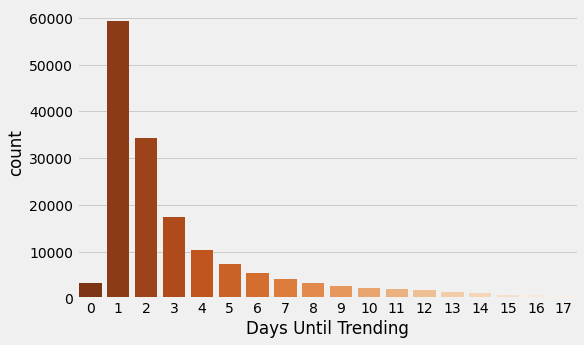

In [107]:
#Map the length of the amount of time taken to get on trending

def subtract_date(date1, date2):
    month_days = np.absolute((int(date2.split('.')[2]) - int(date1.split('-')[1])))*30
    days = np.absolute(int(date2.split('.')[1]) - int(date1.split('-')[2].split('T')[0]))
    return month_days + days

df['Days Until Trending'] = df.apply(lambda row: subtract_date(row['publish_time'], row['trending_date']), axis=1)

plt.figure(figsize=(8,5))
sns.countplot(x='Days Until Trending', data=df, order=range(0,18), palette='Oranges_r')
plt.show()

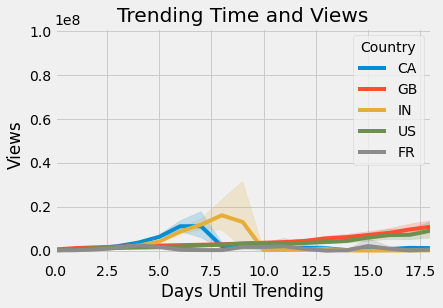

In [86]:
#Correlation between days until trending and views

plt.xlim([0, 18])
sns.lineplot(x='Days Until Trending', y='views', hue='Country', data=df)
plt.ylabel('Views')
plt.title('Trending Time and Views')
plt.show()

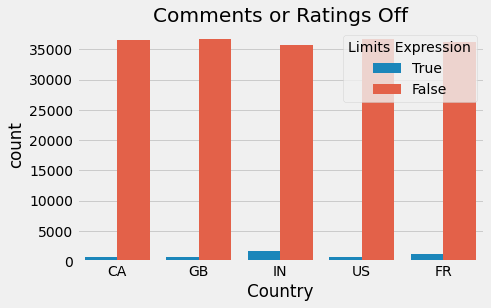

In [108]:
#Correlation between country and limiting features

df['Limits Expression'] = df.apply(lambda row: str(row['comments_disabled'] or row['ratings_disabled']), axis=1)

plt.figure(figsize=(6.5,4))
sns.countplot(x='Country', hue='Limits Expression', data=df, hue_order=['True', 'False'])
plt.title('Comments or Ratings Off')
plt.show()